### SEIR Model Covid-19

*Author*: Simon Frost

*Date*: 2018-07-12

-- http://epirecip.es/epicookbook/chapters/sir/python

Modified for Covid-19 

*Author*: Marcello Perathoner

*Date*: 2020-03-14

## The SEIR Model

For many important infections there is a significant incubation period during which the individual has been infected but is not yet infectious themselves. During this period the individual is in compartment E (for exposed). -- https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import ode, solve_ivp

In [2]:
def seir_ode (times, init, parms):
    α, β, γ, N = parms
    S, E, I, R = init
    # ODEs (ordinary differential equations)
    F = β * I / N
    dS = -F * S
    dE = F * S - α * E
    dR = γ * I
    dI = 0 - dS - dE - dR
    return [dS, dE, dI, dR]

## The Basic Reproduction Number

In epidemiology, the basic reproduction number (sometimes called basic reproductive ratio, or incorrectly basic reproductive rate, and denoted R0, pronounced R nought or R zero) of an infection can be thought of as the expected number of cases directly generated by one case in a population where all individuals are susceptible to infection. -- https://en.wikipedia.org/wiki/Basic_reproduction_number

The R0 of Covid-19 is estimated as: 1.4 – 3.9

R0 = β * γ

In [3]:
N = 60262701        # Italy: Population 60.262.701
S = 3               # Imported Infections 3

α = 2   # How many days before E becomes infectious
β = 1.5 # How many people does an I infect each day on average
γ = 2   # How many days I stays infectious

parms = [1 / α, β, 1 / γ, N] 
init  = [N - S, S, 0, 0]     # S, E, I, R
times = np.linspace (0, 100, 1001)

In [4]:
seir_sol = solve_ivp (fun=lambda t, y: seir_ode(t, y, parms), t_span=[min(times),max(times)], y0=init, t_eval=times)

In [5]:
seir_out = pd.DataFrame({"t":seir_sol["t"],"S":seir_sol["y"][0],"E":seir_sol["y"][1],"I":seir_sol["y"][2],"R":seir_sol["y"][3]})

#### Visualisation

In [6]:
import matplotlib.pyplot as plt

In [7]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (16,8)

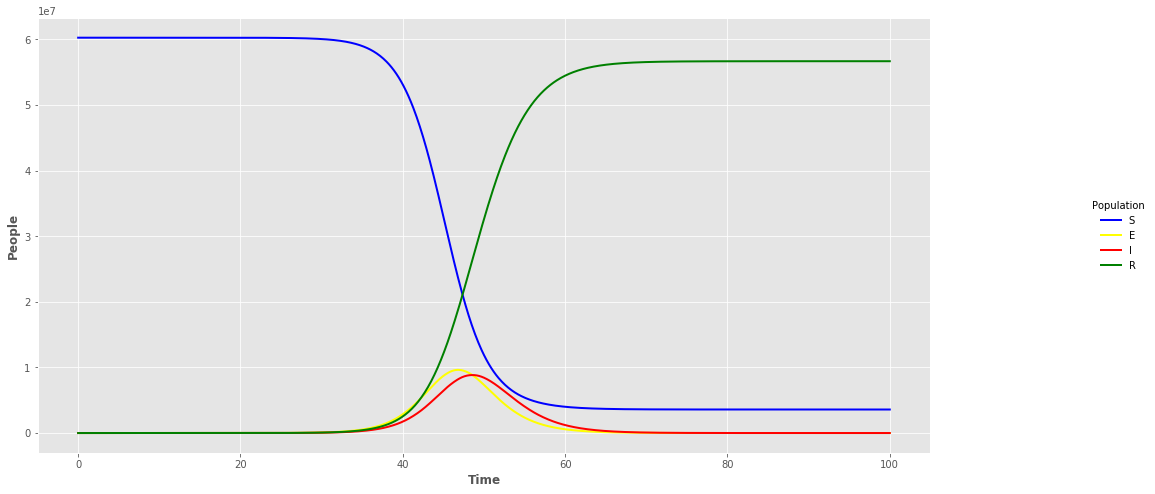

In [8]:
sline = plt.plot("t","S","", data=seir_out, color="blue",   linewidth=2)
eline = plt.plot("t","E","", data=seir_out, color="yellow", linewidth=2)
iline = plt.plot("t","I","", data=seir_out, color="red",    linewidth=2)
rline = plt.plot("t","R","", data=seir_out, color="green",  linewidth=2)

plt.xlabel("Time",   fontweight="bold")
plt.ylabel("People", fontweight="bold")
legend = plt.legend (title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor ("white")
frame.set_linewidth (0)